In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [6]:
file = open("./resources/cost1.csv")
cost = pd.read_csv(file, sep=' ', index_col=False)
file = open("./resources/time1.csv")
time = pd.read_csv(file, sep=' ', index_col=False)


In [19]:
cost=cost.sort_values(by=["size"])
time=time.sort_values(by=["size"])

In [20]:
cost

,size,Matrix,Split,VSplit,EdgeSplit,SideEx,SimpleG,TriScore,TriScoreMargin,TriScoreNaive
0,4,378,378,378,378,378,378,378,378,384
1,4,80,80,80,80,80,80,80,80,80
2,4,635,635,635,635,640,635,635,635,640
3,4,192,192,192,192,192,192,192,192,192
4,4,756,756,756,756,756,756,756,756,756
...,...,...,...,...,...,...,...,...,...,...
67,30,-1,-1,19466,9389,9506,-1,13483,13483,228692
68,30,-1,-1,61902,19048,19051,-1,19197,19197,1713778
65,30,-1,-1,39970,15949,15591,-1,18597,18597,68468
66,30,-1,-1,39013,14194,14206,-1,15076,15076,117444


In [21]:
heuristics = ["size", "VSplit", "SideEx", "TriScore", "TriScoreMargin", "TriScoreNaive"]
exact = ["size", "Matrix", "SimpleG", "Split", "EdgeSplit"]


In [22]:
cost_exact = cost[exact]
time_exact = time[exact]
cost_h = cost[heuristics]
time_h = time[heuristics]

In [23]:
time

,size,Matrix,Split,VSplit,EdgeSplit,SideEx,SimpleG,TriScore,TriScoreMargin,TriScoreNaive
0,4,0.000265,0.000730,0.000710,0.000117,0.000006,0.000186,0.000010,0.000014,0.000002
1,4,0.000216,0.000598,0.000636,0.000088,0.000007,0.000169,0.000009,0.000012,0.000002
2,4,0.000185,0.000539,0.000472,0.000088,0.000005,0.000172,0.000010,0.000013,0.000002
3,4,0.000205,0.000565,0.000561,0.000097,0.000006,0.000175,0.000011,0.000015,0.000003
4,4,0.000178,0.000454,0.000366,0.000077,0.000005,0.000168,0.000009,0.000013,0.000002
...,...,...,...,...,...,...,...,...,...,...
67,30,0.000000,0.000000,0.257223,0.363894,0.000090,0.000000,0.000727,0.000062,0.000039
68,30,0.000000,0.000000,0.266236,0.371488,0.000076,0.000000,0.000927,0.000095,0.000048
65,30,0.000000,0.000000,0.258408,0.377447,0.000083,0.000000,0.000700,0.000072,0.000036
66,30,0.000000,0.000000,0.262329,0.369289,0.000088,0.000000,0.000805,0.000059,0.000052


In [24]:
def plot_by_size(df, scale):
    #on crée un plot
    plt.figure(figsize=(15,12), dpi=80)
    plt.xlabel("Size", size=14)
    plt.xticks(np.arange(0, df["size"].max()+1, 1), fontsize=12)

    plt.ylabel("Performances", size=14)
    plt.yticks(fontsize=12)
    plt.yscale(scale)
    plt.title("Performances per algorithm depending on instance size", size = 16)
    
    legend = []

    #plt.savefig("images/" + in_col + '.png', bbox_inches='tight')
    
    #pour chaque colonne
    for algo in df.columns[1:]:
        #on récupère la bonne colonne et la taille des instances
        dfalgo = df[["size", algo]]
        
        #on récupère le nombre d'instance de chaque taille 
        amount = [0]*(dfalgo["size"].max()+1)
        for index in (dfalgo["size"]).to_numpy():
            amount[index]+=1
            
        #on filtre les résultats invalides
        dfalgo = dfalgo[dfalgo[algo] > 0]
        
        #liste de tailles
        x=(dfalgo["size"]).to_numpy()
        #liste de résultats correspondant
        y=(dfalgo[algo]).to_numpy()
        
        avgy=[0]*len(amount)
        #on commence par faire la somme des résultats pour chaque taille
        for i in range(len(x)):
            avgy[x[i]] += y[i]
        
        #puis on divise pour obtenir la moyenne des résultats pour chaque taille
        for i in range(len(avgy)):
            avgy[i] /= max(amount[i], 1)
            
        #on supprime à nouveau les valeurs invalides
        avgy = [val for val in avgy if val > 0]
        #on supprime les doublons
        uniquex = np.unique(x)
        
        plt.plot(uniquex, avgy)
        legend.append(algo)
        
    #on plot
    plt.legend(legend)
    plt.show()

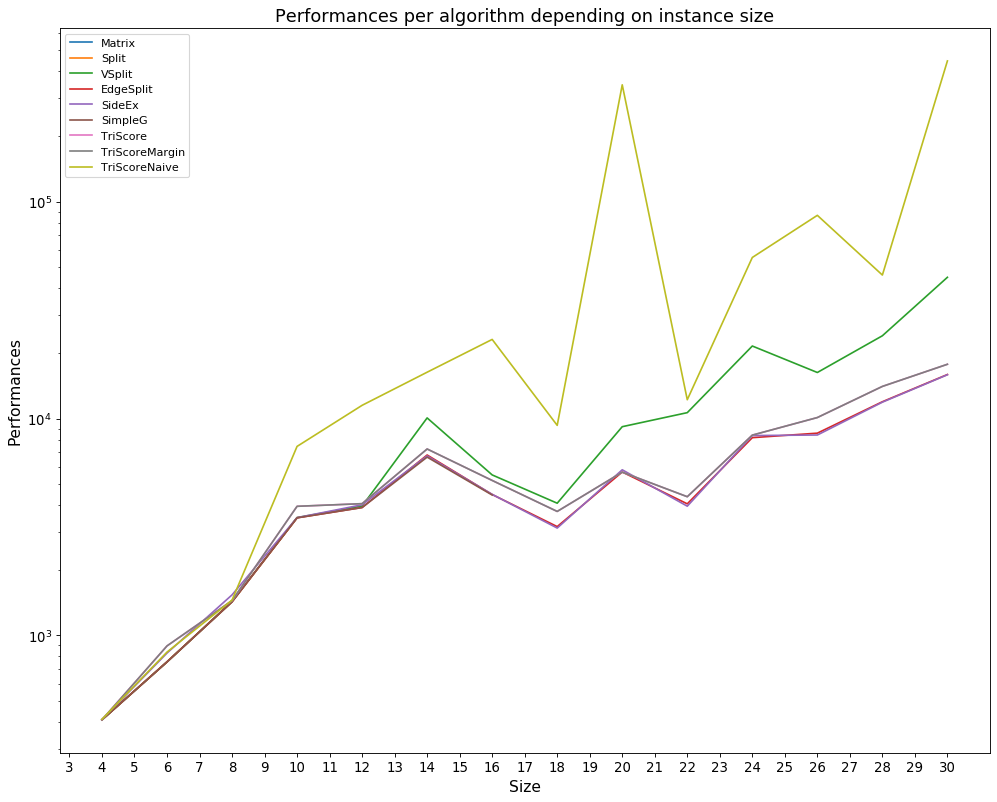

In [25]:
plot_by_size(cost, 'log')

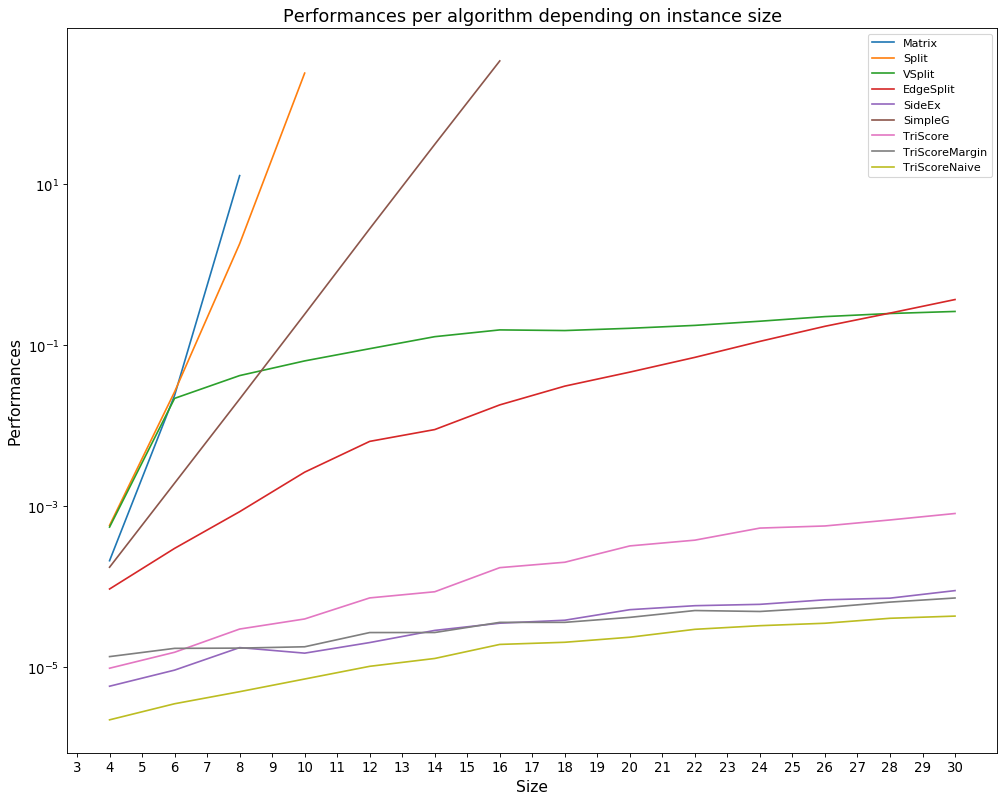

In [26]:
plot_by_size(time, 'log')

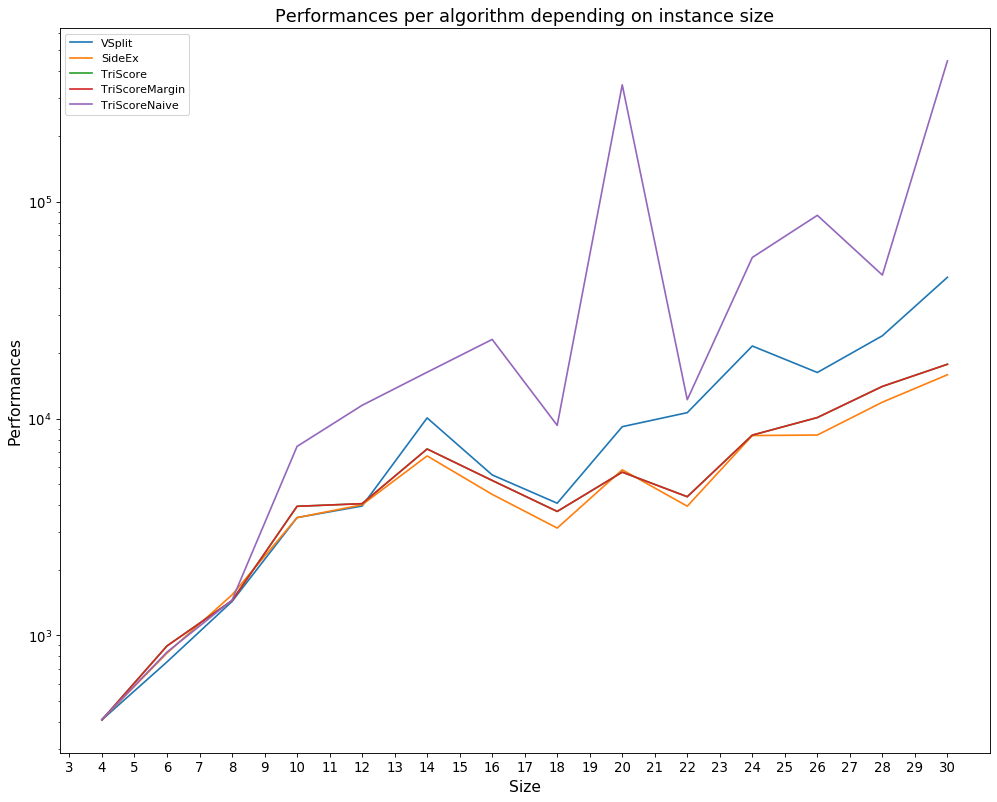

In [27]:
plot_by_size(cost_h, 'log')

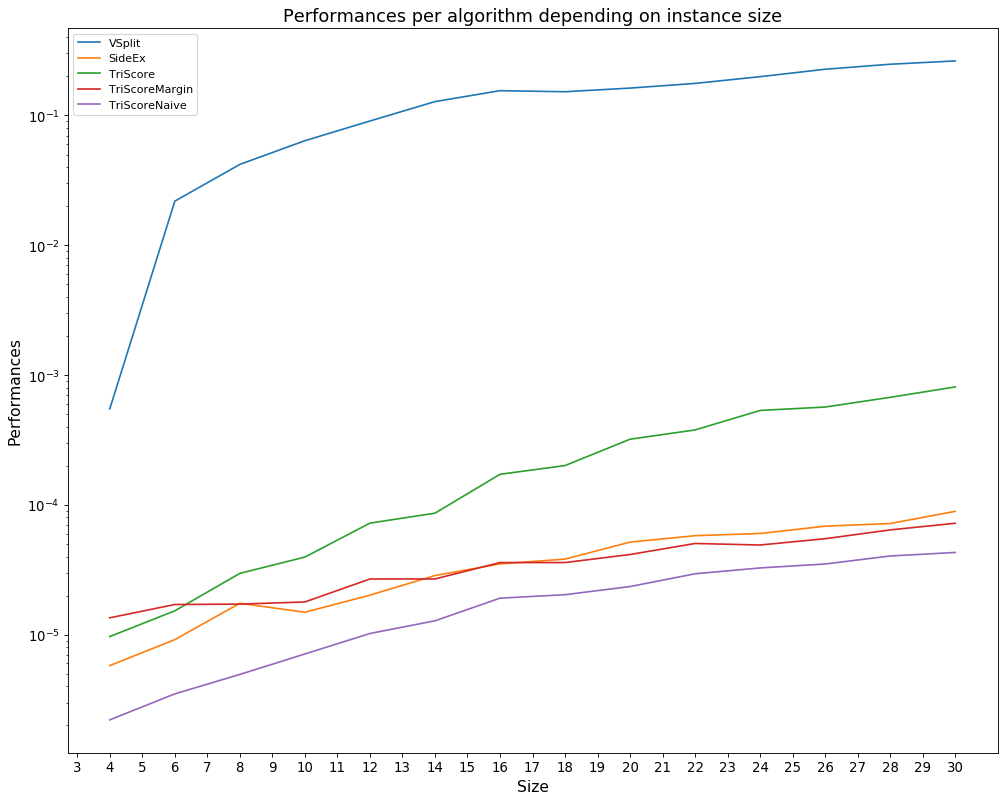

In [28]:
plot_by_size(time_h, 'log')

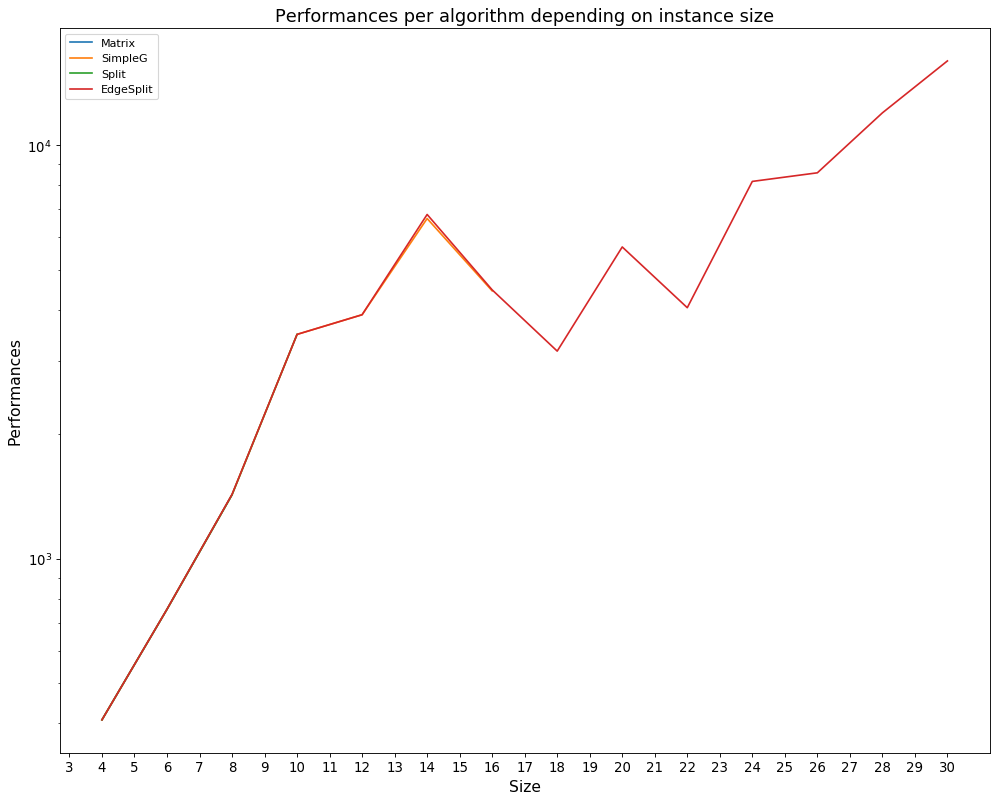

In [29]:
plot_by_size(cost_exact, 'log')

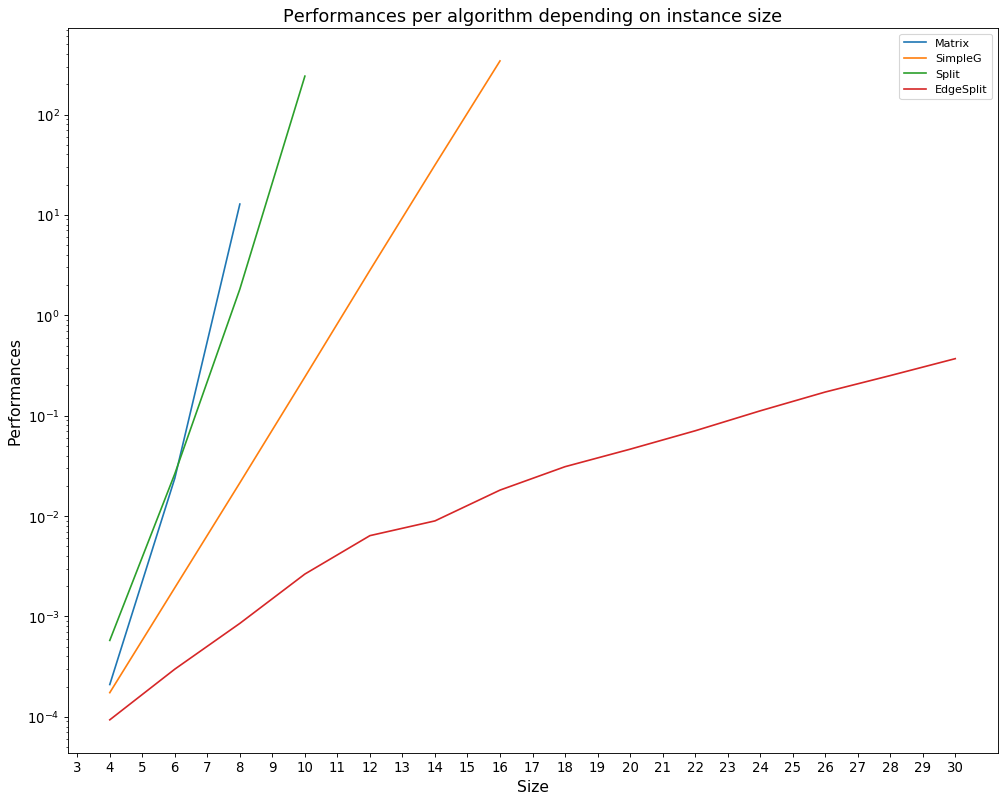

In [30]:
plot_by_size(time_exact, 'log')